In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_singleLSTMv1 = pd.read_csv('/content/drive/MyDrive/data/sel1_observation.csv', index_col='trial')
df_singleLSTMv2 = pd.read_csv('/content/drive/MyDrive/data/sel2_observation.csv', index_col='trial')
df_stackedLSTMv1 = pd.read_csv('/content/drive/MyDrive/data/sdl1_observation.csv', index_col='trial')
df_stackedLSTMv2 = pd.read_csv('/content/drive/MyDrive/data/sdl2_observation.csv', index_col='trial')

In [ ]:
df_singleLSTMv1.head()

,optimizer,units,epochs,batch_size,dropout_rate,learning_rate,loss
trial,,,,,,,
1,SGD,2450,150,128,0.455343,0.005748,66.150764
2,Adagrad,1900,3050,32,0.393865,0.001704,6.330302
3,RMSprop,2500,750,32,0.488702,0.054738,11.116813
4,RMSprop,700,4700,256,0.596639,0.001470,6.985736
5,Adagrad,400,700,512,0.393315,0.020313,7.305125


In [ ]:
df_singleLSTMv2.head()

,optimizer,units,epochs,batch_size,dropout_rate,learning_rate,loss
trial,,,,,,,
1,Nadam,1150,650,64,0.425399,0.013856,8.000573
2,SGD,800,3650,256,0.599323,0.003561,15.017938
3,Adamax,550,150,512,0.155783,0.006360,9.951816
4,SGD,850,4500,64,0.113502,0.321504,6.722417
5,Nadam,2700,3700,512,0.286647,0.002063,14.451367


In [ ]:
df_stackedLSTMv1.head()

,optimizer,units_1,dropout_rate_1,units_2,dropout_rate_2,units_3,dropout_rate_3,units_4,dropout_rate_4,epochs,batch_size,learning_rate,loss
trial,,,,,,,,,,,,,
1,Nadam,1700,0.547128,2400,0.225553,2400,0.120854,3500,0.122884,2750,128,0.001558,17.899176
2,Nadam,3600,0.449154,3850,0.129923,2450,0.287952,3050,0.157726,2300,32,0.006648,53.008534
3,Adagrad,3400,0.487318,1950,0.284208,1800,0.444930,2550,0.571218,3500,256,0.080419,74.436131
4,Adagrad,750,0.557559,2600,0.472017,650,0.495224,2700,0.319140,950,64,0.021409,74.104248
5,Adamax,2500,0.149514,900,0.374907,1950,0.265092,3150,0.436872,4100,256,0.002054,7.638906


In [ ]:
df_stackedLSTMv2.head()

,optimizer,units_1,dropout_rate_1,units_2,dropout_rate_2,units_3,dropout_rate_3,units_4,dropout_rate_4,epochs,batch_size,learning_rate,loss
trial,,,,,,,,,,,,,
1,Adamax,350,0.333622,3900,0.438655,3350,0.140808,3400,0.427832,3050,512,0.005467,12.159953
2,Nadam,1550,0.443789,1300,0.358592,2350,0.231559,3200,0.191327,4950,32,0.005424,36.003931
3,Adamax,2550,0.380375,1600,0.142205,600,0.219512,3500,0.260868,4200,32,0.002290,8.001553
4,Adamax,450,0.575113,3150,0.301692,3750,0.113502,1650,0.544925,1350,128,0.082733,938.447022
5,RMSprop,2750,0.538624,2850,0.103476,3100,0.170243,2750,0.536542,3400,512,0.003233,15.602328


In [ ]:
# Exclude losses from observations which are above 15
limit = 15
df_singleLSTMv1 = df_singleLSTMv1[df_singleLSTMv1.loss <= limit]
df_singleLSTMv2 = df_singleLSTMv2[df_singleLSTMv2.loss <= limit]
df_stackedLSTMv1 = df_stackedLSTMv1[df_stackedLSTMv1.loss <= limit]
df_stackedLSTMv2 = df_stackedLSTMv2[df_stackedLSTMv2.loss <= limit]

In [ ]:
df_singleLSTMv1.describe()

,units,epochs,batch_size,dropout_rate,learning_rate,loss
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2287.209302,2594.186047,127.255814,0.276151,0.121215,6.907337
std,1099.842685,1083.875833,140.960665,0.144666,0.161581,1.347834
min,250.000000,400.000000,16.000000,0.100304,0.001006,6.230225
25%,1475.000000,1850.000000,32.000000,0.148506,0.006820,6.258791
50%,2250.000000,2550.000000,128.000000,0.234450,0.057598,6.330302
75%,3300.000000,3375.000000,128.000000,0.393590,0.175370,6.859737
max,3950.000000,4700.000000,512.000000,0.596639,0.746457,11.862604


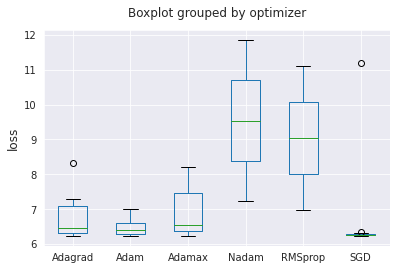

In [ ]:
df_singleLSTMv1.boxplot(column=['loss'], by=['optimizer'])
plt.title('')
plt.xlabel('')
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
df_singleLSTMv2.describe()

,units,epochs,batch_size,dropout_rate,learning_rate,loss
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2467.045455,1752.272727,135.272727,0.405405,0.106817,7.799691
std,901.674359,1254.524581,163.804246,0.115335,0.151130,2.220086
min,250.000000,100.000000,16.000000,0.113502,0.001273,6.184800
25%,2025.000000,887.500000,32.000000,0.348833,0.019440,6.345242
50%,2650.000000,1450.000000,64.000000,0.428084,0.052520,6.707750
75%,3062.500000,2200.000000,128.000000,0.488363,0.132111,8.143473
max,4000.000000,5000.000000,512.000000,0.596413,0.799883,14.451367


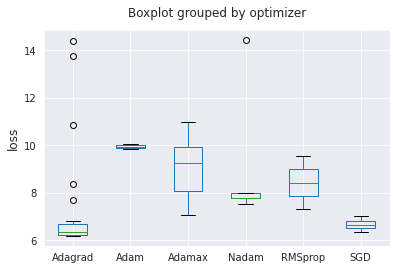

In [ ]:
df_singleLSTMv2.boxplot(column=['loss'], by=['optimizer'])
plt.title('')
plt.xlabel('')
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
df_stackedLSTMv1.describe()

,units_1,dropout_rate_1,units_2,dropout_rate_2,units_3,dropout_rate_3,units_4,dropout_rate_4,epochs,batch_size,learning_rate,loss
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2390.000000,0.204472,703.333333,0.358314,3016.666667,0.335308,3176.666667,0.414284,4173.333333,403.200000,0.002472,7.786318
std,643.705789,0.093074,371.034590,0.115572,525.991128,0.079988,671.848906,0.094606,586.109042,194.102771,0.001552,1.321633
min,1300.000000,0.108669,50.000000,0.103006,1950.000000,0.195917,1800.000000,0.194876,2750.000000,16.000000,0.001008,6.321012
25%,2050.000000,0.146286,425.000000,0.326419,2775.000000,0.288085,2750.000000,0.386567,3900.000000,384.000000,0.001052,6.864372
50%,2500.000000,0.174404,700.000000,0.342210,3150.000000,0.358310,3500.000000,0.435616,4250.000000,512.000000,0.002082,7.301474
75%,2675.000000,0.224886,900.000000,0.392183,3300.000000,0.381323,3650.000000,0.467968,4550.000000,512.000000,0.002881,8.394687
max,3800.000000,0.478055,1350.000000,0.596250,3750.000000,0.480648,3900.000000,0.538908,5000.000000,512.000000,0.005702,11.224712


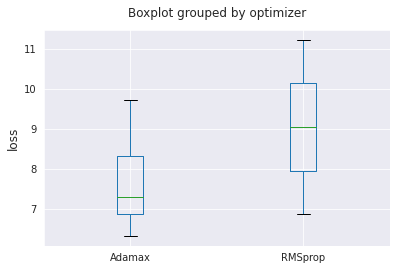

In [ ]:
df_stackedLSTMv1.boxplot(column=['loss'], by=['optimizer'])
plt.title('')
plt.xlabel('')
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
df_stackedLSTMv2.describe()

,units_1,dropout_rate_1,units_2,dropout_rate_2,units_3,dropout_rate_3,units_4,dropout_rate_4,epochs,batch_size,learning_rate,loss
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2915.625000,0.291658,1812.500000,0.248054,1125.000000,0.412615,1078.125000,0.213845,3453.125000,99.000000,0.007386,8.452071
std,919.006483,0.089862,729.497544,0.128508,732.802838,0.112342,1140.024671,0.128080,905.072511,134.275339,0.017954,2.422718
min,350.000000,0.112058,800.000000,0.135093,100.000000,0.140808,50.000000,0.103343,1600.000000,16.000000,0.001046,6.352539
25%,2375.000000,0.233032,1525.000000,0.160063,737.500000,0.384138,187.500000,0.134491,3000.000000,32.000000,0.001175,6.556361
50%,3150.000000,0.295716,1800.000000,0.199644,925.000000,0.433601,600.000000,0.163956,3625.000000,32.000000,0.001901,7.846646
75%,3525.000000,0.339292,2012.500000,0.276204,1287.500000,0.467088,1525.000000,0.261933,4075.000000,80.000000,0.002457,8.835074
max,4000.000000,0.464007,3900.000000,0.577324,3350.000000,0.590292,3500.000000,0.574660,4500.000000,512.000000,0.072872,13.469746


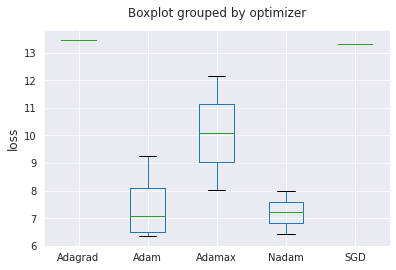

In [ ]:
df_stackedLSTMv2.boxplot(column=['loss'], by=['optimizer'])
plt.title('')
plt.xlabel('')
plt.ylabel('loss', fontsize=12)
plt.show()

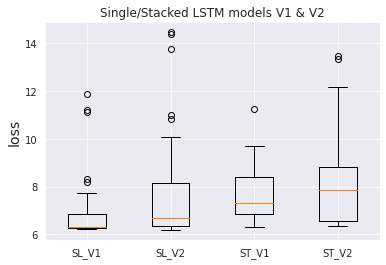

In [ ]:
# Overall model loss evaluation
# SL: Single LSTM Model
# ST: Stacked LSTM Model
# V1: Version 1
# V2: Version 2
# Single LSTM Version 1 has least loss as compared to other models

plt.boxplot([df_singleLSTMv1.loss, df_singleLSTMv2.loss, df_stackedLSTMv1.loss, df_stackedLSTMv2.loss], labels=['SL_V1', 'SL_V2', 'ST_V1', 'ST_V2'])
plt.title('Single/Stacked LSTM models V1 & V2')
plt.ylabel('loss', fontsize=14)
plt.show()

In [ ]:
# Overall model loss
# M is Manual hyperparameter optimization
# A is Automated hyperparameter optimization
model_loss = {
    'model': ['ARIMA', 'GARCH', 'LR', 'M_SL_V1', 'M_SL_V2', 'M_ST_V1', 'M_ST_V2', 'A_SL_V1', 'A_SL_V2', 'A_ST_V1', 'A_ST_V2'],
    'loss': [9.37, 2.93, 9.40, 10.95, 10.83, 10.53, 11.94, 7.21, 7.44, 7.72, 7.31]
    }
df_loss = pd.DataFrame(data=model_loss)

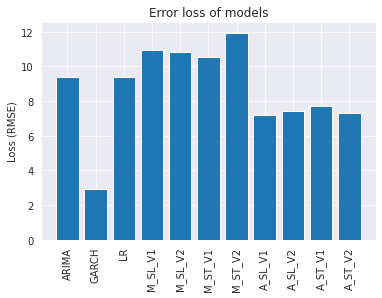

In [ ]:
data = df_loss.loss
labels = df_loss.model
plt.xticks(range(len(data)), labels, rotation=90)
plt.ylabel('Loss (RMSE)')
plt.title('Error loss of models')
plt.bar(range(len(data)), data) 
plt.show()